Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



2022-12-20 11:26:13.544336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 11:26:13.871900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 11:26:13.871920: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 11:26:14.939269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [4]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 40

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

display(lbl_train)

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import numpy as np

regfactors: list[float] = [0.000001, 0.000123,  0.00001, 0.0001,  0.001]

def trainwithfactor(regvalue: float) -> float:
        ## Define model ##
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        return score[1]

results = []

for factor in regfactors:
        break
        res: list[float] = []
        for i in range(3):
                print(i, "in", regfactors.index(factor))
                res.append(trainwithfactor(factor))
        results.append(res)


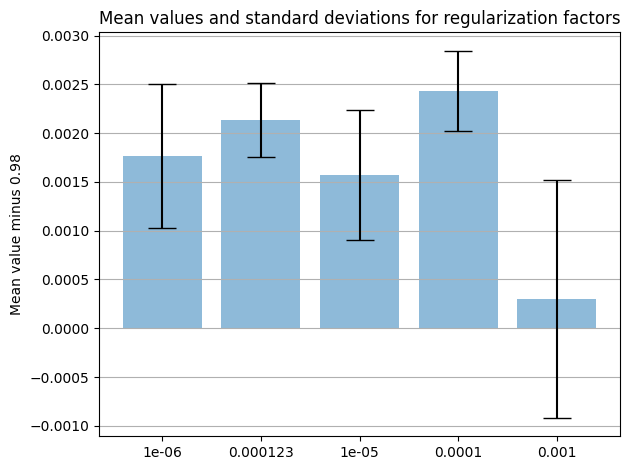

In [7]:
import numpy as np
import matplotlib.pyplot as plt
regfactors: list[float] = [0.000001, 0.000123,  0.00001, 0.0001,  0.001]
res = [[0.9811000227928162, 0.9814000129699707, 0.9828000068664551], [0.9815999865531921, 0.9824000000953674, 0.9824000000953674], [0.9810000061988831, 0.9811999797821045, 0.9825000166893005], [0.9829000234603882, 0.9825000166893005, 0.9818999767303467], [0.979200005531311, 0.9797000288963318, 0.9819999933242798]]
resstds = [np.std(tup) for tup in res]
resmeans = [np.mean(tup)-0.98 for tup in res]
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5], resmeans, yerr=resstds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean value minus 0.98')
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(regfactors)
ax.set_title('Mean values and standard deviations for regularization factors')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Flatten())   
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=40,
        verbose=1,
        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
model.summary()
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

In [9]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(fit_info.history['loss'])
plt.plot(fit_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

NameError: name 'fit_info' is not defined

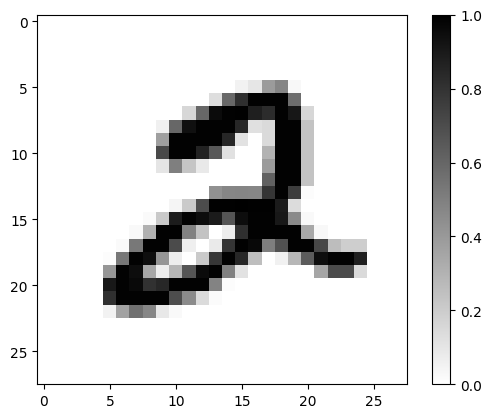

In [ ]:
plt.figure()
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### Question 4) Auto-Encoder for denoising


In [13]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c

print(x_train.shape)
#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.1)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=0.1)


(60000, 28, 28, 1)


In [15]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)

encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

1
(1, 96)
1/1 [==============================] - 0s 18ms/step


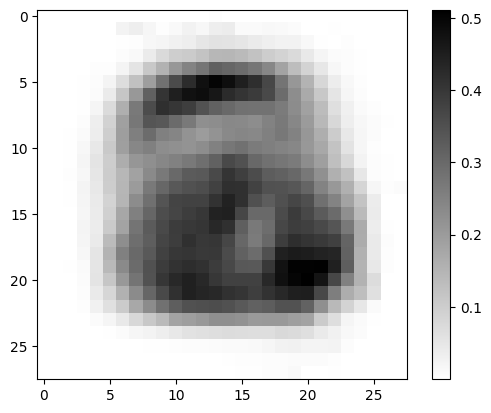

In [54]:
randominput = np.array([np.random.randint(2, size=96)])
print(len(randominput))
lol = np.array([[*range(96)]])
print(randominput.shape)
plt.figure()
plt.imshow(decoder.predict(randominput)[0].reshape(28,28,1), cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [19]:
def aefit():
    autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                verbose=0,
                validation_data=(flattened_x_test_seasoned, flattened_x_test))



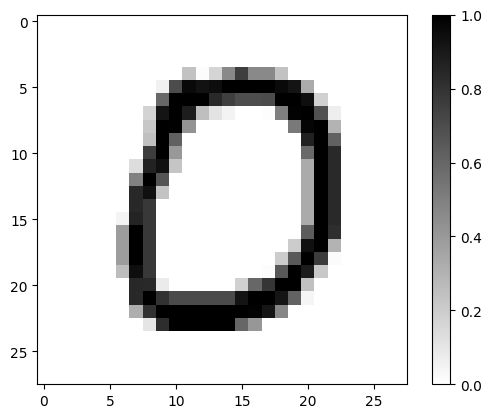

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [18]:
plt.figure()
plt.imshow(x_test[10], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

noise = 0.1
for _ in range(5):
    flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise)
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise)
    aefit()
    out = autoencoder.predict([(flattened_x_test_seasoned)])
    plt.figure()
    plt.imshow(flattened_x_test_seasoned[5].reshape(28,28,1), cmap=plt.cm.binary)
    plt.savefig(f"noised_{noise}.png")
    plt.colorbar()
    plt.show()
    plt.figure()
    plt.imshow(out[5].reshape(28,28,1), cmap=plt.cm.binary)
    plt.savefig(f"denoised_{noise}.png")
    plt.colorbar()
    plt.show()
    
    noise += 0.2

In [11]:
# Best performant model
bpmodel = Sequential()
bpmodel.add(Flatten())
bpmodel.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
bpmodel.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
bpmodel.add(Dense(num_classes, activation='softmax'))

bpmodel.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

bpmodel.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(x_test, y_test))



In [26]:
seasonedresults = []
denoisedresults = []
noise = 0.1
for _ in range(5):
    flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise)
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise)
    aefit()
    denoised = autoencoder.predict([(flattened_x_test_seasoned)])
    score = bpmodel.evaluate(flattened_x_test_seasoned.reshape(10000, 28, 28, 1), y_test, verbose=0)
    seasonedresults.append(score[1])
    score = bpmodel.evaluate(denoised.reshape(10000, 28, 28, 1), y_test, verbose=0)
    denoisedresults.append(score[1])


    noise += 0.2

print(seasonedresults)
print(denoisedresults)

313/313 [==============================] - 0s 926us/step
[0.9491000175476074, 0.6323000192642212, 0.3499999940395355, 0.1851000040769577, 0.1216999962925911]
[0.9742000102996826, 0.9478999972343445, 0.8644999861717224, 0.5964999794960022, 0.1590999960899353]


In [28]:
print(seasonedresults)
print(denoisedresults)

[0.9491000175476074, 0.6323000192642212, 0.3499999940395355, 0.1851000040769577, 0.1216999962925911]
[0.9742000102996826, 0.9478999972343445, 0.8644999861717224, 0.5964999794960022, 0.1590999960899353]
